In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  #Untuk split data menjadi train dan test
from sklearn.metrics import accuracy_score, mean_squared_error            
from sklearn.linear_model import Lasso, Ridge

import warnings
warnings.filterwarnings("ignore")
from sklearn.utils.testing import ignore_warnings

In [2]:
from sklearn.datasets import load_boston # Import dataset, format json

In [3]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
X = pd.DataFrame(data=boston['data'], columns = [boston['feature_names']])
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
y = pd.Series(boston['target'])
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

## Data Splittng

In [7]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    #stratify=y,karena data numerik jadi tidak perlu stratify
    test_size = 0.2,
    random_state = 1899)

### Ridge Regression

In [8]:
hyperparam=[100000,10000,1000,100,10,1,0.1,0.001]
training_mse = [] # karena regeresi pakai MSE
testing_mse = []  # karena regeresi pakai MSE
score = 0

for i in range(len(hyperparam)) :
    ridge = Ridge(alpha=hyperparam[i])
    ridge.fit(X_train,y_train)
    
    y_predict_train = ridge.predict(X_train)
    training_mse.append(mean_squared_error(y_train,y_predict_train))
    
    y_predict_test = ridge.predict(X_test)
    mse_score = mean_squared_error(y_test,y_predict_test)
    testing_mse.append(mse_score)
    
    if i == 0:
        score = mse_score
        best_param = hyperparam[i]
        
    if score>mse_score:
        score = mse_score # MSE semakin kecil semakin baik, kebalikan accuracy
        best_param = hyperparam[i]

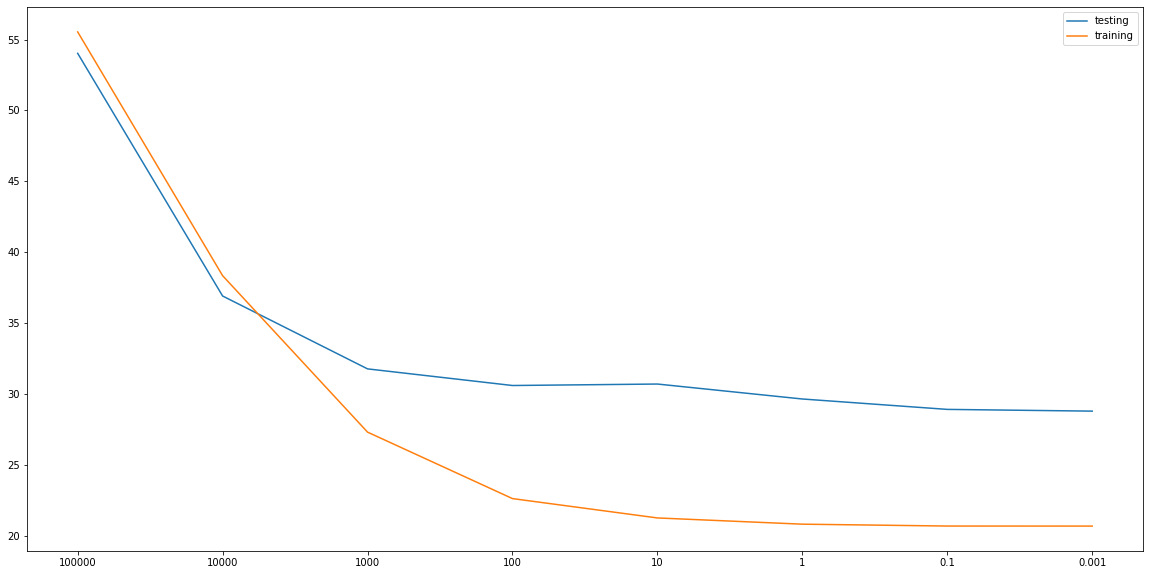

In [9]:
length = range(len(hyperparam))
plt.figure(figsize=(20,10))
sns.lineplot(length,testing_mse)
sns.lineplot(length,training_mse)

plt.legend(['testing','training'])

plt.xticks(length,hyperparam)
plt.show()

Kemungkinan terjadi underfitting di kiri, dan overfitting di kanan

In [10]:
print(f'best param = {best_param},\nbest mse = {mse_score}')

best param = 0.001,
best mse = 28.778402778052968


In [11]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

mse masih terlalu tinggi (dibanding mean)

In [12]:
ridge = Ridge(alpha= 0.001)
ridge.fit(X_train,y_train)

Ridge(alpha=0.001)

In [13]:
y_reg_train = ridge.predict(X_train)
y_reg_test = ridge.predict(X_test)

In [14]:
coef_ridge = pd.DataFrame({
    'feature_name':list(X),
    'feature_coef':ridge.coef_
})

In [15]:
coef_ridge

,feature_name,feature_coef
0,"(CRIM,)",-0.123098
1,"(ZN,)",0.027489
2,"(INDUS,)",0.040234
3,"(CHAS,)",1.676822
4,"(NOX,)",-14.800396
5,"(RM,)",4.324093
6,"(AGE,)",0.002115
7,"(DIS,)",-1.253837
8,"(RAD,)",0.328548
9,"(TAX,)",-0.014321


## Cara Baca
* NOX (-14,80) = setiap nox naik 1 prediksi harga berkurang $14
* angka yang rendah kemungkinan kena penalty oleh ridge, because its not really necessary

In [16]:
print('mse_train =',mean_squared_error(y_train,y_reg_train))
print('mse_test  =',mean_squared_error(y_test,y_reg_test))

mse_train = 20.664301374310284
mse_test  = 28.778402778052968


### Kesimpulan
* Ketika memakai nilai aplha yang terlalu tinggi, maka terjadi underfitting, ditandai denga nilai MSE baik train maupun test yang tinggi, ini terjadi, karena nilai alpha tinggi memberi penalti yang tinggi juga, berarti model kita menjadi terlalu simple
* ketika nilai alpha diturunkan, terlihat, baik nilai mse train dan test juga ikut berkurang, sanmpai akhirnya nilai mse train sedikit lebih rendah dari test
* alpha terbaik dalam kasus ini adalah 0.001 dengan ilai mse 28.778

### Lasso Regression

In [17]:
hyperparam=[100000,10000,1000,100,10,1,0.1,0.001]
training_mse = [] # karena regeresi pakai MSE
testing_mse = []  # karena regeresi pakai MSE
score = 0

for i in range(len(hyperparam)) :
    lasso = Lasso(alpha=hyperparam[i])
    lasso.fit(X_train,y_train)
    
    y_predict_train = lasso.predict(X_train)
    training_mse.append(mean_squared_error(y_train,y_predict_train))
    
    y_predict_test = lasso.predict(X_test)
    mse_score = mean_squared_error(y_test,y_predict_test)
    testing_mse.append(mse_score)
    
    if i == 0:
        score = mse_score
        best_param = hyperparam[i]
        
    if score>mse_score:
        score = mse_score # MSE semakin kecil semakin baik, kebalikan accuracy
        best_param = hyperparam[i]

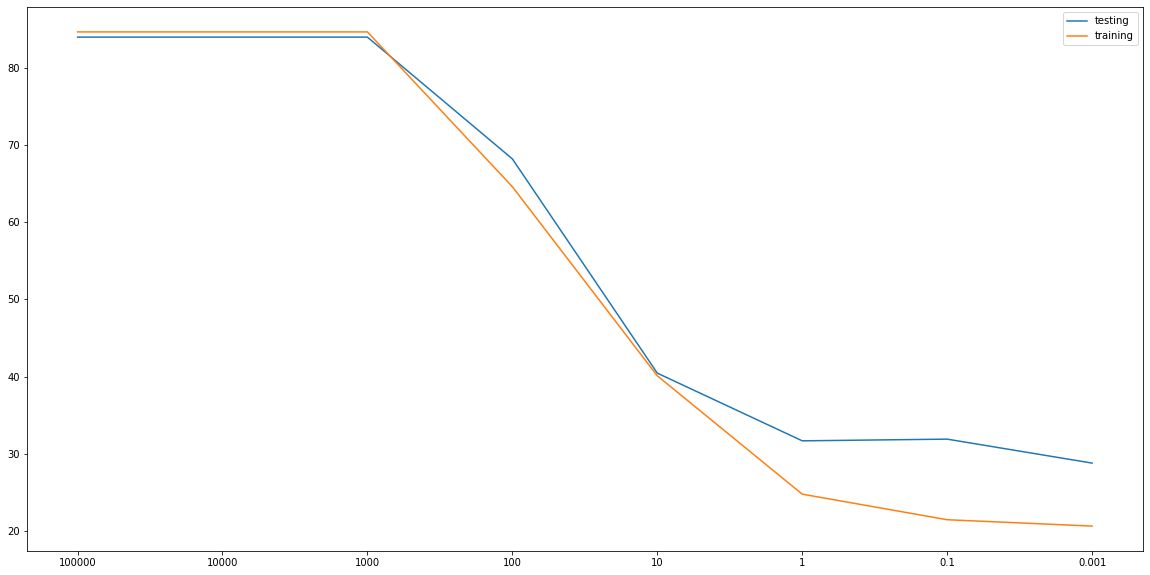

In [18]:
length = range(len(hyperparam))
plt.figure(figsize=(20,10))
sns.lineplot(length,testing_mse)
sns.lineplot(length,training_mse)

plt.legend(['testing','training'])

plt.xticks(length,hyperparam)
plt.show()

In [19]:
print(f'best param = {best_param},\nbest mse = {mse_score}')

best param = 0.001,
best mse = 28.82051128409872


In [20]:
lasso = Lasso(alpha= 0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [21]:
y_reg_train = lasso.predict(X_train)
y_reg_test = lasso.predict(X_test)

In [22]:
coef_lasso = pd.DataFrame({
    'feature_name':list(X),
    'feature_coef':lasso.coef_
})

In [23]:
coef_lasso

,feature_name,feature_coef
0,"(CRIM,)",-0.122920
1,"(ZN,)",0.027515
2,"(INDUS,)",0.038746
3,"(CHAS,)",1.655566
4,"(NOX,)",-14.470963
5,"(RM,)",4.324770
6,"(AGE,)",0.001868
7,"(DIS,)",-1.248666
8,"(RAD,)",0.327883
9,"(TAX,)",-0.014347


In [24]:
print('mse_train =',mean_squared_error(y_train,y_reg_train))
print('mse_test  =',mean_squared_error(y_test,y_reg_test))

mse_train = 20.664674253173075
mse_test  = 28.82051128409872


### Kesimpulan
* Ketika memakai nilai aplha yang terlalu tinggi, maka terjadi underfitting, yang ditandai dengan tingginya nilai mse di train data, karena banyaknya penalti yang diberikan terhadap koefisien model aklibatnya model menjadi terlalu simple.
* ketika nilai alpha diturunkan, terlihat, baik nilai mse train dan test juga ikut berkurang, sanmpai akhirnya nilai mse train sedikit lebih rendah dari test
* alpha terbaik dalam kasus ini adalah 0.001 dengan ilai mse 28.778

Moment of truth when use big ass lasso

In [25]:
lasso = Lasso(alpha= 1000)
lasso.fit(X_train,y_train)

Lasso(alpha=1000)

In [26]:
coef_lasso = pd.DataFrame({
    'feature_name':list(X),
    'feature_coef':lasso.coef_
})

In [27]:
coef_lasso

,feature_name,feature_coef
0,"(CRIM,)",-0.0
1,"(ZN,)",0.0
2,"(INDUS,)",-0.0
3,"(CHAS,)",0.0
4,"(NOX,)",-0.0
5,"(RM,)",0.0
6,"(AGE,)",-0.0
7,"(DIS,)",0.0
8,"(RAD,)",-0.0
9,"(TAX,)",-0.0


semua bernilai 0 karena penalti yang diberikan terlalu besar seiring dengan besarnya nilai alpha